

<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Họ tên sinh viên:
* Mã sinh viên:
* Lớp/Nhóm môn học:
* Email:

---

## CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING) - Phần 01
---
Một thuật toán học máy được gọi là học có giám sát (supervised learning) nếu việc xây dựng mô hình dự đoán mối quan hệ giữa đầu vào và đầu ra được thực hiện dựa trên các cặp (đầu vào - input, đầu ra - label) đã biết trong tập huấn luyện. Đây là nhóm thuật toán phổ biến nhất trong các thuật toán machine learning.

Tập dữ liệu học (Training data) bao gồm các quan sát (Examples, Observations), mà mỗi quan sát được gắn kèm với một giá trị đầu ra mong muốn (Label)
<img src='pic/label.png' width='600px'>

Học có giám sát bao gồm 2 loại:
* Phân loại (Classification): Nếu nhãn (y – Target) thuộc tập rời rạc và hữu hạn
* Hồi quy (Regression): Nếu nhãn (y – Target) là biến liên tục (các số thực) ví dụ như dự báo nhiệt độ, giá nhà, mức tiêu thụ điện năng…

<img src='pic/type.png' width='500px'>

# A| Phân loại (Classification)

## I) THUẬT TOÁN KNN
---
Bản chất, KNN là thuật toán đi tìm đầu ra cuả một điểm dữ liệu mới bằng cách chỉ dựa trên thông tin của K điểm dữ liệu trong tập huấn luyện gần nó nhất (K-lân cận)

<img src='pic/knn.png' width='300px'>

**Xác định người láng giềng gần nhất:**
<img src='pic/knn1.png' width='400px'>

**Tính khoảng cách giữa 2 điểm A-B:**
<img src='pic/distance1_knn.png' width='500px'>
<img src='pic/distance2_knn.png' width='500px'>

Ưu điểm:
* Độ phức tạp tính toán trong quá trình huấn luyện bằng 0
* Việc dự đoán kết quả của dữ liệu mới rất đơn giản
* Không cần giả sử gì về phân phối của các class

Nhược điểm:
* KNN rất nhạy với nhiễu khi K nhỏ.
* Tính toán khoảng cách tới từng điểm dữ liệu trong trong tập huấn luyện tốn rất nhiều thời gian, đặc biệt với các CSDL có số chiều lớn và có nhiều điểm dữ liệu. K càng lớn thì độ phức tạp càng tăng.
* Lưu toàn bộ dữ liệu trong bộ nhớ ảnh hưởng tới hiệu năng của KNN

## VÍ DỤ THỰC HÀNH 1:
## PHÂN LOẠI HOA LAN VỚI THUẬT TOÁN KNN
---
Tập dữ liệu bao gồm 150 mẫu về thông số chiều rộng, chiều dài của lá hóa và cánh hoa của 3 loại hoa Lan được gán nhãn:
* 0 - Setosa (50 mẫu)
* 1 - Vericolor (50 mẫu)
* 2 - Virginica (50 mẫu)

<img src='pic/iris.png' width='400px'>

### 1. Đọc dữ liệu mẫu từ Sklearn
* X_iris: chứa các feature đầu vào (input)
* y_iris: chứa label đầu ra (target)

In [1]:
#1. ĐỌC DỮ LIỆU MẪU VÀO BIẾN DATAFRAME (Chương 2)
#Đọc tập dữ liệu Iris Dataset
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
df_iris['label'] = data['target']
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [2]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df_iris.iloc[48:59:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
48,5.3,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1


In [4]:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [5]:
#Quan sát đặc trưng thống kê của tập dữ liệu
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


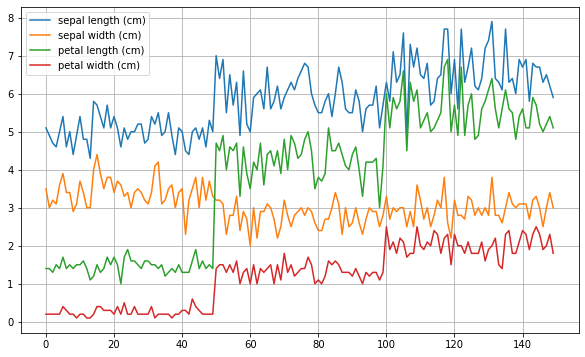

In [6]:
#View dữ liệu các thuộc tính độc lập
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.plot(df_iris.iloc[:,:4])
plt.legend(['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
plt.grid(True)
plt.show()

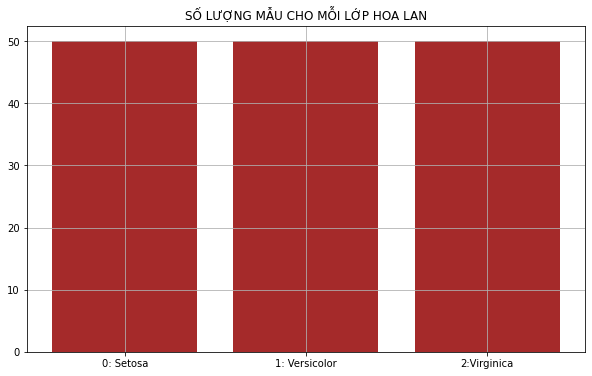

In [7]:
#Kiểm tra cân bằng dữ liệu
x = df_iris['label'].value_counts()

label=['0: Setosa', '1: Versicolor', '2:Virginica']

fig = plt.figure(figsize=(10,6))
plt.title('SỐ LƯỢNG MẪU CHO MỖI LỚP HOA LAN')
plt.bar(label,x, color='brown')
plt.grid(True)
plt.show()

#--->Tập dữ liệu cân bằng

In [8]:
#2. ĐỌC DỮ LIỆU MẪU VÀO BIẾN ARRAY X, y
#Đọc tập dữ liệu Iris Dataset
X_iris, y_iris = load_iris(return_X_y=True)

print(type(X_iris))
print('Kích thước biến độc lập X(features):', X_iris.shape)
print('Kích thước biến phụ thuộc y(target)   :', y_iris.shape)

<class 'numpy.ndarray'>
Kích thước biến độc lập X(features): (150, 4)
Kích thước biến phụ thuộc y(target)   : (150,)


In [9]:
#Biến độc lập
X_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
#Biến phụ thuộc:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#Hiển thị dữ liệu 1 vài mẫu
print('Bộ dữ liệu 1)  ', X_iris[1,:], '--',y_iris[1])
print('Bộ dữ liệu 55) ', X_iris[55,:], '--',y_iris[55])
print('Bộ dữ liệu 111)', X_iris[111,:], '--',y_iris[111])

Bộ dữ liệu 1)   [4.9 3.  1.4 0.2] -- 0
Bộ dữ liệu 55)  [5.7 2.8 4.5 1.3] -- 1
Bộ dữ liệu 111) [6.4 2.7 5.3 1.9] -- 2


### 2. Tách tập dữ liệu ra tập Training - Test: 
---
* Training: dùng để huấn luyện mô hình (70%)
* Test: dùng để kiểm thử mô hình (30%)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, 
                                                    y_iris,
                                                    test_size=0.3,
                                                    random_state=42)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 105
2. Kích thước tập Test    : 45


In [13]:
#print(X_train)
#print(y_train)

In [14]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

## 3. Sử dụng mô hình KNN cho bài toán phân lớp
---

In [15]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [16]:
#Khai báo sử dụng thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN sử dụng các tham số mặc định
KNN_iris = KNeighborsClassifier()

### Một số tham số quan trọng của thuật toán KNN trong thư viện sklearn:
Tham khảo KNN của thư viện sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


1. n_neighbors: số điểm lân cận sử dụng (default = 5)
2. weights: có tính trọng số của các điểm lân cận hay không?
    * uniform: Tất cả các điểm lân cận đều có trọng số như nhau (default)
    * distance: Các điểm lân cận gần hơn sẽ được đánh trọng số cao hơn
3. algorithm: Thuật toán sử dụng để tính các điểm lân cận: ball_tree, kd_tree, brute, auto (default)
4. p: xác định khoảng cách tính theo manhattan (p=1) hay tính theo euclidean (p=2 default)


In [17]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_iris.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_iris.predict(X_test)

print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại hoa lan trên tập dữ liệu TEST:
Predicted labels:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Ground truth    :  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


*Kết quả cho thấy nhãn dự đoán gần giống với nhãn thật của trên tập dữ liệu kiểm thử, chỉ có 1 mẫu trong số 30 mẫu trong tập Test có kết quả sai lệch. Ở đây chúng ta làm quen với khái niệm mới: ground truth. Một cách đơn giản, ground truth chính là nhãn/label/đầu ra thực sự của các điểm trong test data.*

## 4. Đánh giá độ chính xác của mô hình phân loại:
---

Cách đơn giản và hay được sử dụng nhất là Accauracy: Tính tỷ lệ giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.

In [19]:
#Sử dụng module accuracy_score trong thư viện sklearn để đánh giá độ chính xác:
#Độ chính xác theo tỷ lệ số mẫu dự đoán đúng / tổng số mẫu của tập test
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print('Độ chính xác của mô hình phân lớp hoa lan (k=5 default):', acc1)
print('Độ chính xác theo %:', round(acc1*100,2))

Độ chính xác của mô hình phân lớp hoa lan (k=5 default): 1.0
Độ chính xác theo %: 100.0


In [20]:
# Số liệu cho biết tổng số mẫu dự đoán đúng trên tập Test
acc2 = accuracy_score(y_test, y_pred,normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc2, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 45  / 45


## 5. Thay đổi tham số của mô hình
---

**n_neighbors: số điểm lân cận (K nên chọn là số lẻ)**


**weights: Đánh trọng số cho các điểm lân cận**
* Trong kỹ thuật major voting bên trên, mỗi trong 11 điểm gần nhất được coi là có vai trò như nhau và giá trị lá phiếu của mỗi điểm này là như nhau. Trong thực tế ta thấy rằng những điểm gần hơn nên có trọng số cao hơn (càng thân cận thì càng tin tưởng). Vậy nên sẽ đánh trọng số khác nhau cho mỗi trong 11 điểm gần nhất này. Cách đánh trọng số phải thoải mãn điều kiện là một điểm càng gần điểm test data thì phải được đánh trọng số càng cao (tin tưởng hơn).

* Scikit-learn giúp chúng ta đơn giản hóa việc này bằng cách gán gía trị weights = 'distance'. (Giá trị mặc định của weights là 'uniform', tương ứng với việc coi tất cả các điểm lân cận có giá trị như nhau như ở trên).

In [ ]:
# Thay đổi tham số n_neighbors, weights:
KNN_iris2 = KNeighborsClassifier(n_neighbors=11, 
                                 weights='distance')
#Thực hiện huấn luyện với dữ liệu tập train
KNN_iris2.fit(X_train,y_train)

In [ ]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred2 = KNN_iris2.predict(X_test)
print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred2)
print("Ground truth    : ", y_test)

In [ ]:
acc21 = accuracy_score(y_test, y_pred2)
print('Độ chính xác của mô hình phân lớp hoa lan (k=11, weights=distance):', acc21)
print('Độ chính xác theo %:', round(acc21*100,2))

In [ ]:
acc22 = accuracy_score(y_test, y_pred2, normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc22, ' /', len(y_test))

In [ ]:
import numpy as np
a= [3.5,6,1.8,2.6]
a_array = np.array([(3,6,3.9,2.3)])
#a_array.reshape(1,4)
print(a_array.shape)
print(a_array)

In [ ]:
label = KNN_iris2.predict(a_array)
print(label)

## B| THỰC HÀNH TRÊN LỚP:
---
Sử dụng dữ liệu đã được tiền xử lý trong tập Data_titanic_ok.csv của chương 2. Xây dựng model học máy dự đoán khả năng không được cứu (0) - được cứu (1) của hành khách:
<img src='Pic/titanic.jpg'>

In [ ]:
#Đọc tập dữ liệu đã xử lý trong chương 2
import pandas as pd
df_titanic = pd.read_csv('data/Data_Titanic_ok.csv')
df_titanic.info()


In [ ]:
#Hiển thị 5 dòng dữ liệu của Dataset
df_titanic.head()


In [ ]:
#Tách biến độc lập - biến phụ thuộc
#1.Tách biến độc lập X_titanic
X_titanic = df_titanic.iloc[:,1:].values
X_titanic

In [ ]:
#2.Tách biến độ lập y_titanic
y_titanic = df_titanic.iloc[:,0].values
y_titanic


In [ ]:
#Tách thành tập Train-Test theo tỷ lệ 75-25:
from sklearn.model_selection import train_test_split
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic,
                                                                                   y_titanic,
                                                                                   test_size=0.3,
                                                                                   random_state=42)

#print("1. Kích thước tập Training: %d" %len(y_titanic_train))
#print("2. Kích thước tập Test    : %d" %len(y_titanic_test))
#Tách thành tập Train-Test theo tỷ lệ 75-25:                                                                     random_state=42)

print("1. Kích thước tập Training: ", X_titanic_train.shape)
print("2. Kích thước tập Test    : ",X_titanic_test.shape)


In [ ]:
#Xây dựng model và huấn luyện:
from sklearn.neighbors import KNeighborsClassifier


#Khai báo model với các tham số mặc định:
KNN_titanic = KNeighborsClassifier()

#Huấn luyện model với tập Train:
KNN_titanic.fit(X_titanic_train, y_titanic_train)
#Độ chính xác của Model trên tập Huấn luyện
acc_train = KNN_titanic.score(X_titanic_train, y_titanic_train)
print("Độ chính xác của Model trên tập train: ", round(acc_train*100,2))

In [ ]:
#Dự đoán trên tập test

y_titanic_pred = KNN_titanic.predict(X_titanic_test)
print("Mô hình dự đoán: ",y_titanic_pred[50:80])
print("giá trị thật   : ",y_titanic_test[50:80])

In [ ]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_titanic_test, y_titanic_pred)
print("Độ chính xác trên tập test: ", round(acc_test*100,2),"(%)")



In [ ]:
#Đếm số mẫu dự đoán đúng
acc_test1 = accuracy_score(y_titanic_test, y_titanic_pred, normalize = False)
print("số mẫu dự đoán đúng trên tập test: ", acc_test1, "/", len(y_titanic_test))


## Sử dụng Confusion matrix kiểm tra độ chính xác của model
---
Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng (hoặc tổng có bao nhiêu mẫu phân loại đúng) mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là confusion matrix.

<img src='Pic/confusionmarix.jpg' width='400px'>

In [ ]:
#Đếm số lượng theo từng lớp trong tập Test
from collections import Counter

print('Tổng số mẫu tập Test:', len(y_titanic_test))
print(Counter(y_titanic_test))

In [ ]:
#Đếm số mẫu dự đoán đúng
acc_titanic2 = accuracy_score(y_titanic_test, y_titanic_pred,normalize=False)
print('Tổng số mẫu dự đoán đúng trên tập Test:', acc_titanic2, ' /', len(y_titanic_test))

In [ ]:
#Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix
cnf_matrix_titanic = confusion_matrix(y_titanic_test,y_titanic_pred,)
print('Confusion matrix - Titanic:')
print(cnf_matrix_titanic)

In [ ]:
#Trực quan hóa ma trận Confusion matrix:

import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Ground Truth label')
    plt.xlabel('Predicted label')

In [ ]:
class_names = [0,1]
plot_confusion_matrix(cnf_matrix_titanic,
                      classes=class_names,
                      title='Confusion matrix - Titanic')

In [ ]:
plot_confusion_matrix(cnf_matrix_titanic, 
                      classes=class_names, 
                      normalize=True,
                      title='Normalized confusion matrix - Titanic:')
plt.show()

In [ ]:
(217+120)/393

## Thay đổi tham số của mô hình:
---
**Học Viên Thay đổi các tham số của model KNN-->Xác định bộ tham số có độ chính xác trên tập train - test cao nhất (ưu tiên tập Test)?**


In [ ]:
#Thay đổi các tham số của model: đánh giá độ chính xác

#Tách thành tập Train-Test theo tỷ lệ 75-25:
from sklearn.model_selection import train_test_split
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic,
                                                                                   y_titanic,
                                                                                   test_size=0.3,
                                                                                   random_state=42)

#print("1. Kích thước tập Training: %d" %len(y_titanic_train))
#print("2. Kích thước tập Test    : %d" %len(y_titanic_test))
#Tách thành tập Train-Test theo tỷ lệ 75-25:                                                                     random_state=42)

print("1. Kích thước tập Training: ", X_titanic_train.shape)
print("2. Kích thước tập Test    : ",X_titanic_test.shape)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


#Khai báo model với các tham số mặc định:
KNN_titanic = KNeighborsClassifier(n_neighbors=7, 
                                 weights='uniform')

#Huấn luyện model với tập Train:
KNN_titanic.fit(X_titanic_train, y_titanic_train)
#Độ chính xác của Model trên tập Huấn luyện
acc_train = KNN_titanic.score(X_titanic_train, y_titanic_train)
print("Độ chính xác của Model trên tập train: ", round(acc_train*100,2))

In [ ]:
y_titanic_pred = KNN_titanic.predict(X_titanic_test)
print("Mô hình dự đoán: ",y_titanic_pred[50:100])
print("giá trị thật   : ",y_titanic_test[50:100])

In [ ]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_titanic_test, y_titanic_pred)
print("Độ chính xác trên tập test: ", round(acc_test*100,2),"(%)")

In [ ]:
#Đếm số mẫu dự đoán đúng
acc_test1 = accuracy_score(y_titanic_test, y_titanic_pred, normalize = False)
print("số mẫu dự đoán đúng trên tập test: ", acc_test1, "/", len(y_titanic_test))

# THỰC HÀNH 6: 
---
Sử dụng thuật toán KNN phân loại rượu dựa vào các thống số liên quan

* Tìm hiểu tập dữ liệu mẫu "Wine recognition dataset" của Sklearn (đã làm trong chương 2)
    - Các biến độc lập (input - features)
    - Biến phụ thuộc  (label - target)
<img src='pic/win1.png' width='250px'>
* Áp dụng thuật toán KNN để phân loại rượu
    - Tách tập dữ liệu theo tỷ lệ 75% cho tập huấn luyện - 25% cho tập kiểm tra
    - Sử dụng thuật toán KNN với các trường hợp: K= 5, 7, 11, 13 cho biết độ chính xác ứng với từng K đó trên tập Test.
    - Áp dụng thuật toán KNN với k=9 và có đánh trọng số các điểm lân cận. Cho biết độ chính xác của thuật toán trên tập Test và Ma trận confusion tương ứng.

In [ ]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY!}









